In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
path1='Dataset/exercise.csv'
exercise=pd.read_csv(path1)
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105,40.8
1,14861698,female,20,166.0,60.0,14.0,94,40.3
2,11179863,male,69,179.0,79.0,5.0,88,38.7
3,16180408,female,34,179.0,71.0,13.0,100,40.5
4,17771927,female,27,154.0,58.0,10.0,81,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92,40.4
14996,17212577,female,27,165.0,65.0,6.0,85,39.2
14997,17271188,female,43,159.0,58.0,16.0,90,40.1
14998,18643037,male,78,193.0,97.0,2.0,84,38.3


In [2]:
path2='Dataset/calories.csv'
calories=pd.read_csv(path2)
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


<font size="5">Data Preprocessing</font>

checking is null values exists or not

In [3]:
exercise.isnull().sum()

User_ID        0
Gender         0
Age            0
Height         4
Weight        17
Duration       3
Heart_Rate     0
Body_Temp      0
dtype: int64


<font size=2>from this it is understood that the attributes that have null values are Height , Weight , Duration respectively</font>


<font size="5">Filling Missing values for weight using averaging in an age interval</font>

In [4]:
import statistics
NullWeight = exercise[exercise["Weight"].isnull()].replace(np.nan , 0) # storing the data for null weights and setting the nan values as zero 
print("Before : \n ",NullWeight) # shows the result
exercise["Weight"] = exercise["Weight"].replace(np.nan , 0)  # storing the data for null weights and setting the nan values as zero 
i = 0
for age in NullWeight['Age']: # accessing each age 
    age = age // 10 # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)]  # collecting age interval for a given age
    ageRangeAverage = np.nanmean(ageRange["Weight"]) # calculating the mean of the particular interval
    exercise["Weight"].iloc[i] = ageRangeAverage # updating the mean inplace for the missing values in the main dataset
    NullWeight["Weight"].iloc[i] = ageRangeAverage
    i += 1
print("\nAfter:\n",NullWeight) # displaying the updated result for the range of null dataset

Before : 
         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
114   13616455    male   21   189.0     0.0      27.0         114       41.0
123   18789619  female   35   182.0     0.0       2.0          83       38.4
162   19572798  female   38   169.0     0.0      14.0          94       40.1
200   12847212  female   30   168.0     0.0       6.0          76       39.4
269   13135068  female   69   156.0     0.0       8.0          83       39.4
797   16156697  female   43   173.0     0.0       0.0          79       38.2
802   19354925    male   33   181.0     0.0       4.0          89       38.6
808   16908484  female   46   168.0     0.0       2.0          85       37.7
872   19928569  female   39   159.0     0.0      15.0          93       40.0
878   19906933    male   53   179.0     0.0      14.0          93       40.0
942   16583091  female   28   163.0     0.0      27.0          99       41.1
1013  15330323    male   58   191.0     0.0      16.0          9

<font size="5">Filling Missing values for Height and Weight  using averaging in an age interval</font>

In [5]:
NullHeight = exercise[exercise["Height"].isnull()].replace(np.nan , 0) # storing the data for null weights and setting the nan values as zero 
exercise["Height"] = exercise["Height"].replace(np.nan , 0)  # storing the data for null weights and setting the nan values as zero 
i = 0
for age in NullHeight['Age']: # accessing each age 
    age = age // 10 # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)]  # collecting age interval for a given age
    ageRangeAverage = np.nanmean(ageRange["Height"]) # calculating the mean of the particular interval
    exercise["Height"].iloc[i] = ageRangeAverage # updating the mean inplace for the missing values in the main dataset
    NullWeight["Height"].iloc[i] = ageRangeAverage
    i += 1
print("\nAfter:\n",NullWeight) # displaying the updated result for the range of null dataset

NullDuration = exercise[exercise["Duration"].isnull()].replace(np.nan , 0)
print(NullDuration)
print("Update Null Duration")
i = 0
for age in NullDuration['Age']: # accessing each age 
    age = age // 10 # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)]  # collecting age interval for a given age
    ageRangeAverage = np.nanmean(ageRange["Duration"]) # calculating the mean of the particular interval
    exercise["Duration"].iloc[i] = ageRangeAverage # updating the mean inplace for the missing values in the main dataset
    NullDuration["Duration"].iloc[i] = ageRangeAverage
    i += 1
    
i = 0
for age in NullDuration['Age']: # accessing each age 
    age = age // 10 # setting up the range for age
    age = age * 10
    ageRange = exercise[(exercise["Age"] >= age) & (exercise["Age"] <= age + 10)]  # collecting age interval for a given age
    ageRangeAverage = np.nanmean(ageRange["Duration"]) # calculating the mean of the particular interval
    exercise["Duration"].iloc[i] = ageRangeAverage # updating the mean inplace for the missing values in the main dataset
    NullDuration["Duration"].iloc[i] = ageRangeAverage
    i += 1

NullDuration = exercise[exercise["Duration"].isnull()].replace(np.nan , 0)  
print(NullDuration)


After:
        User_ID  Gender  Age      Height     Weight  Duration  Heart_Rate  \
114   13616455    male   21  174.562739  73.181027      27.0         114   
123   18789619  female   35  174.173175  74.458074       2.0          83   
162   19572798  female   38  174.562739  74.458074      14.0          94   
200   12847212  female   30  174.423704  74.458074       6.0          76   
269   13135068  female   69  156.000000  76.178569       8.0          83   
797   16156697  female   43  173.000000  75.407039       0.0          79   
802   19354925    male   33  181.000000  74.466627       4.0          89   
808   16908484  female   46  168.000000  75.407039       2.0          85   
872   19928569  female   39  159.000000  74.472098      15.0          93   
878   19906933    male   53  179.000000  75.672227      14.0          93   
942   16583091  female   28  163.000000  73.193189      27.0          99   
1013  15330323    male   58  191.000000  75.672227      16.0          94   
115

<font size="5">Normalization of data set</font>

In [6]:
from sklearn.preprocessing import MinMaxScaler
print ("Before Normalization : \n")
exercise.head()

Before Normalization : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,174.562739,73.181027,15.421533,105,40.8
1,14861698,female,20,174.173175,74.458074,15.421533,94,40.3
2,11179863,male,69,174.562739,74.458074,15.569460,88,38.7
3,16180408,female,34,174.423704,74.458074,13.000000,100,40.5
4,17771927,female,27,154.000000,76.178569,10.000000,81,39.8


In [7]:
norm = MinMaxScaler()
data = exercise
data["Duration"] = norm.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Normalisation : \n")
data.head()

After Normalisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,174.562739,73.181027,0.497294,105,40.8
1,14861698,female,20,174.173175,74.458074,0.497294,94,40.3
2,11179863,male,69,174.562739,74.458074,0.502395,88,38.7
3,16180408,female,34,174.423704,74.458074,0.413793,100,40.5
4,17771927,female,27,154.000000,76.178569,0.310345,81,39.8


<font size="5">Standardization of data set</font>

In [8]:
from sklearn.preprocessing import StandardScaler 
print ("Before Standardisation : \n")
exercise.tail()

Before Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,0.344828,92,40.4
14996,17212577,female,27,165.0,65.0,0.172414,85,39.2
14997,17271188,female,43,159.0,58.0,0.517241,90,40.1
14998,18643037,male,78,193.0,97.0,0.034483,84,38.3
14999,11751526,male,63,173.0,79.0,0.586207,92,40.5


In [9]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
data = exercise
data["Duration"] = scalar.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Standardisation : \n")
data.head()

After Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,174.562739,73.181027,-0.013273,105,40.8
1,14861698,female,20,174.173175,74.458074,-0.013273,94,40.3
2,11179863,male,69,174.562739,74.458074,0.004512,88,38.7
3,16180408,female,34,174.423704,74.458074,-0.304403,100,40.5
4,17771927,female,27,154.000000,76.178569,-0.665080,81,39.8


In [10]:
#combining data frames
data=pd.concat([exercise,calories['Calories']],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,174.562739,73.181027,-0.013273,105,40.8,231.0
1,14861698,female,20,174.173175,74.458074,-0.013273,94,40.3,66.0
2,11179863,male,69,174.562739,74.458074,0.004512,88,38.7,26.0
3,16180408,female,34,174.423704,74.458074,-0.304403,100,40.5,71.0
4,17771927,female,27,154.000000,76.178569,-0.665080,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.000000,86.000000,-0.544855,92,40.4,45.0
14996,17212577,female,27,165.000000,65.000000,-1.145983,85,39.2,23.0
14997,17271188,female,43,159.000000,58.000000,0.056274,90,40.1,75.0
14998,18643037,male,78,193.000000,97.000000,-1.626885,84,38.3,11.0


In [11]:
#shape of the dataset
data.shape

(15000, 9)

In [12]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    14997 non-null  float64
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.0+ MB


In [13]:
#missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      3
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Heart_Rate'}>],
       [<AxesSubplot:title={'center':'Body_Temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

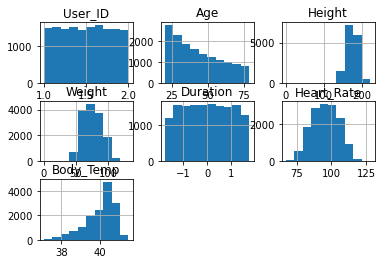

In [14]:
from matplotlib import pyplot
exercise.hist()

In [15]:
#DATA SUMMARIZATION
#STATISTICAL METHODS


In [16]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,1.499700e+04,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.418581,74.889723,1.562322e-16,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.538709,15.231519,1.000033e+00,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,0.000000,0.000000,-1.747111e+00,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,-9.055314e-01,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,5.627354e-02,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,8.978528e-01,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,1.739432e+00,128.000000,41.500000,314.000000


In [17]:
#DATA VISUALIZATION

In [18]:
sb.set()

In [19]:
# #gender count using countplot
# sb.countplot(data['Gender'])

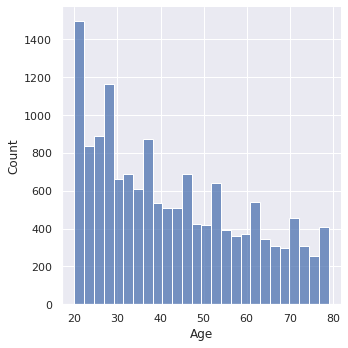

In [20]:
#distribution of age,height,weight column using distplot
sb.displot(data['Age'])

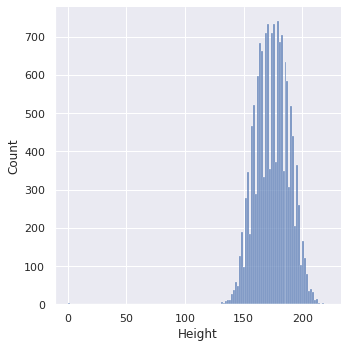

In [21]:
sb.displot(data['Height'])

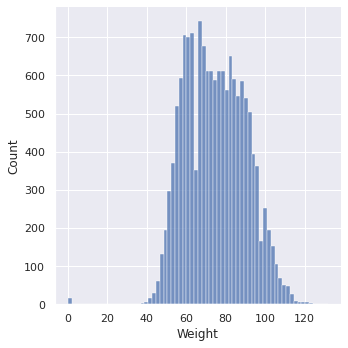

In [22]:
sb.displot(data['Weight'])

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Heart_Rate'}>],
       [<AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>, <AxesSubplot:>]],
      dtype=object)

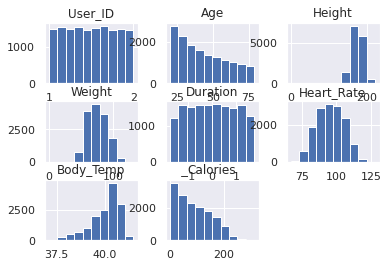

In [23]:
#Histogram for all attributes
data.hist()

User_ID          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Weight           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Duration      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Heart_Rate    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Body_Temp           AxesSubplot(0.125,0.125;0.227941x0.222059)
Calories         AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

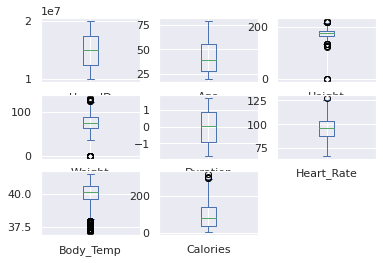

In [24]:
#box plot
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)

In [ ]:
#density plot
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [ ]:
scatter_matrix(data[['Age','Calories']])